In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.analysis import Validation

In [2]:
babies = glob.glob("../analysis/studies/onelep/output/Run2/*.root")
babies = [baby for baby in babies if "VBSWH_mkW" not in baby]
babies

['../analysis/studies/onelep/output/Run2/SingleTop.root',
 '../analysis/studies/onelep/output/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output/Run2/WJets.root',
 '../analysis/studies/onelep/output/Run2/TTX.root',
 '../analysis/studies/onelep/output/Run2/VH.root',
 '../analysis/studies/onelep/output/Run2/Bosons.root',
 '../analysis/studies/onelep/output/Run2/data.root']

In [3]:
vbswh = Validation(
    bkg_root_files=babies[:-1],
    data_root_files=babies[-1:],
    ttree_name="tree",
    weight_columns=["xsec_sf", "lep_sf"]
)
vbswh.make_selection("M_jj > 500 and abs(deta_jj) > 3 and ST < 1000")

In [4]:
vbswh.print_cutflow()

,SingleTop,,TTbar1L,,TTbar2L,,WJets,,TTX,,VH,,Bosons,,data,,TotalBkg,
cut,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt,raw,wgt
base,9211,664.74,356596,15598.86,39349,1407.21,10249,490.89,124977,143.19,14077,7.22,9296,29.79,17465,17465.00,1127510,36683.79
M_jj_gt_500_and_abs(deta_jj)_gt_3_and_ST_lt_1000,8947,633.38,352221,15419.27,38687,1384.00,8654,470.75,120427,139.42,13545,6.57,8496,28.65,17220,17220.00,550977,18082.04


(<AxesSubplot:ylabel='Events'>,
 <AxesSubplot:xlabel='$M_{jj}$ [GeV]', ylabel='data/MC'>)

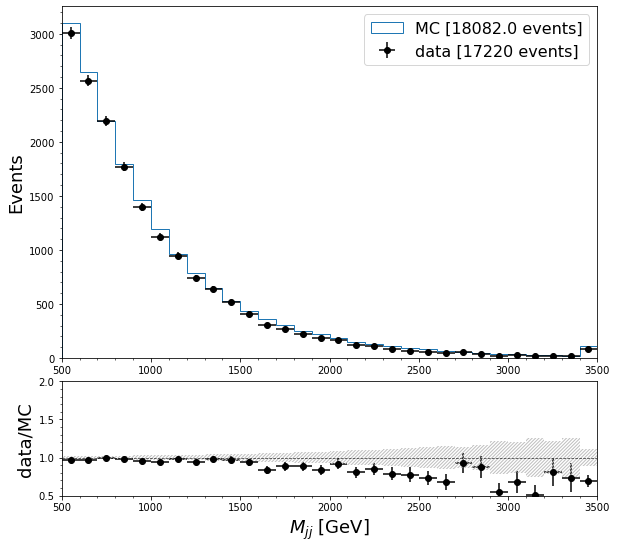

In [8]:
vbswh.plot_data_vs_mc("M_jj", bins=np.linspace(500, 3500, 31), x_label=r"$M_{jj}$ [GeV]")

(<AxesSubplot:ylabel='Events'>,
 <AxesSubplot:xlabel='$|\\Delta\\eta_{jj}|$', ylabel='data/MC'>)

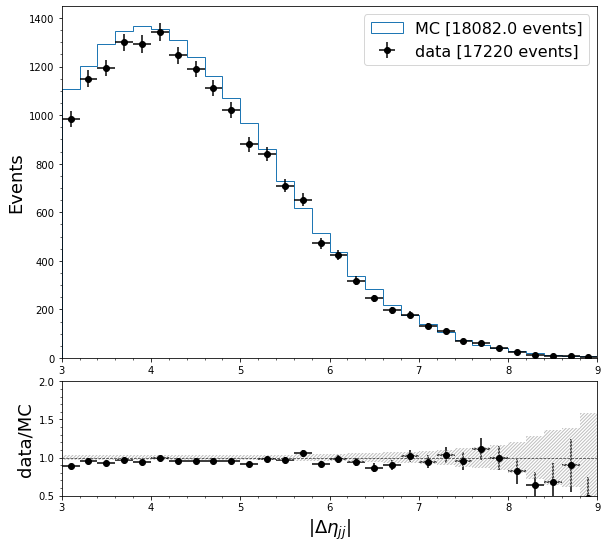

In [6]:
vbswh.plot_data_vs_mc(
    "deta_jj", bins=np.linspace(3, 9, 31), x_label=r"$|\Delta\eta_{jj}|$", transf=abs
)

(<AxesSubplot:ylabel='Events'>,
 <AxesSubplot:xlabel='$S_T$ [GeV]', ylabel='data/MC'>)

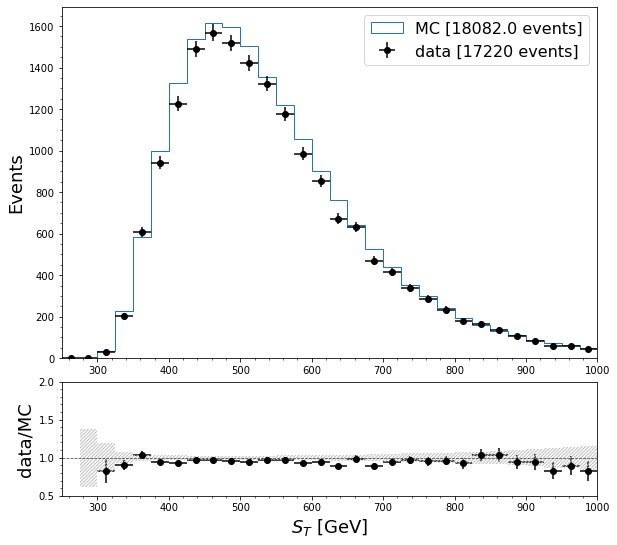

In [7]:
vbswh.plot_data_vs_mc(
    "ST", bins=np.linspace(250, 1000, 31), x_label=r"$S_T$ [GeV]"
)